In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.graphics.tsaplots as sgt
from statsmodels.tsa.arima_model import ARIMA
from scipy.stats.distributions import chi2
from math import sqrt
import seaborn as sns 
sns.set()
import warnings 
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv("https://raw.githubusercontent.com/Premalatha-success/Datasets/main/yearly-water-usage.csv",header=0,index_col=0,parse_dates=True)

In [3]:
df.shape

(79, 1)

In [4]:
df.head()

,Water
Year,
1885-01-01,356
1886-01-01,386
1887-01-01,397
1888-01-01,397
1889-01-01,413


In [5]:
df.tail()

,Water
Year,
1959-01-01,594
1960-01-01,587
1961-01-01,587
1962-01-01,625
1963-01-01,613


In [6]:
df.dtypes

Water    int64
dtype: object

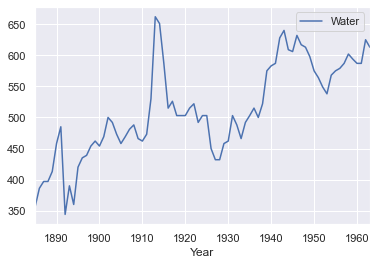

In [7]:
df.plot()
plt.show()

array([[<AxesSubplot:title={'center':'Water'}>]], dtype=object)

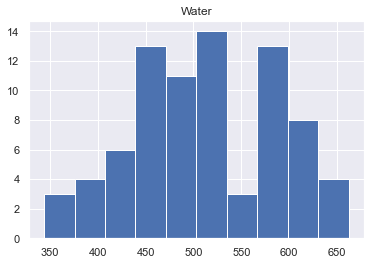

In [8]:
df.hist()

In [9]:
#separate out a validation dataset
split_point=len(df)-10
dataset,validation=df[0:split_point],df[split_point:]
print("Dataset %d,Validation %d" % (len(dataset),len(validation)))
dataset.to_csv("dataset.csv",header=False)
validation.to_csv("validation.csv",header=False)

Dataset 69,Validation 10


In [10]:
#evaluate a persistance model
from pandas import read_csv
from sklearn.metrics import mean_squared_error
from math import sqrt
#load data
train=read_csv("dataset.csv",header=None,index_col=0,parse_dates=True,squeeze=True)
x=train.values
x=x.astype("float32")
train_size=int(len(x)*0.50)
train,test=x[0:train_size],x[train_size:]

In [11]:
df.head()

,Water
Year,
1885-01-01,356
1886-01-01,386
1887-01-01,397
1888-01-01,397
1889-01-01,413


In [12]:
history=[x for x in train]
predictions=list()
for i in range(len(test)):
    yhat=history[-1]
    predictions.append(yhat)
 #observation   
    obs=test[i]
    history.append(obs)
    print(">Predictrd=%.3f,Expected=%.3f" %(yhat,obs))
#report performance
rmse=sqrt(mean_squared_error(test,predictions))
print("RMSE: %.3f" %rmse)

>Predictrd=503.000,Expected=503.000
>Predictrd=503.000,Expected=503.000
>Predictrd=503.000,Expected=515.000
>Predictrd=515.000,Expected=522.000
>Predictrd=522.000,Expected=492.000
>Predictrd=492.000,Expected=503.000
>Predictrd=503.000,Expected=503.000
>Predictrd=503.000,Expected=450.000
>Predictrd=450.000,Expected=432.000
>Predictrd=432.000,Expected=432.000
>Predictrd=432.000,Expected=458.000
>Predictrd=458.000,Expected=462.000
>Predictrd=462.000,Expected=503.000
>Predictrd=503.000,Expected=488.000
>Predictrd=488.000,Expected=466.000
>Predictrd=466.000,Expected=492.000
>Predictrd=492.000,Expected=503.000
>Predictrd=503.000,Expected=515.000
>Predictrd=515.000,Expected=500.000
>Predictrd=500.000,Expected=522.000
>Predictrd=522.000,Expected=575.000
>Predictrd=575.000,Expected=583.000
>Predictrd=583.000,Expected=587.000
>Predictrd=587.000,Expected=628.000
>Predictrd=628.000,Expected=640.000
>Predictrd=640.000,Expected=609.000
>Predictrd=609.000,Expected=606.000
>Predictrd=606.000,Expected=

In [13]:
#evaluate on ARIMA model for a given (p,d,q) and return Rmse
def evaluate_arima_model(x,arima_order):
#prepare training dataset
    x=x.astype("float32")
    train_size=int(len(x)*0.50)
    train,test=x[0:train_size],x[train_size:]
    history=[x for x in train]
#make predictions
    predictions=list()
    for t in range(len(test)):
        model=ARIMA(history,order=arima_order)
        model_fit=model.fit(disp=0)
        yhat=model_fit.forecast()[0]
        predictions.append(yhat)
        history.append(test[t])
#caluculte out of sample error
    rmse=sqrt(mean_squared_error(test,predictions))
    return rmse

In [14]:
#evaluate combinations of p,d, q values on arima model
def evaluate_models(dataset,p_values,d_values,q_values):
    datset=dataset.astype("float32")
    best_score,best_cfg=float("inf"),None
    for p in p_values:
        for d in d_values:
            for q in q_values:
                order=(p,d,q)
                try:
                    rmse=evaluate_arima_model(train,order)
                    if rmse<best_score:
                        best_score,best_cfg=rmse,order
                        print("ARIMA%s RMSE=%.3f" %(order,rmse))
                except:
                    continue
    print("Best ARIMA%s RMSE=%.3f" %(best_cfg,best_score))

In [15]:
train=read_csv("dataset.csv",header=None,index_col=0,parse_dates=True,squeeze=True)
p_values=range(0,2)
d_values=range(0,2)
q_values=range(0,2)
warnings.filterwarnings("ignore")
evaluate_models(train.values,p_values,d_values,q_values)

ARIMA(0, 0, 0) RMSE=76.755
ARIMA(0, 0, 1) RMSE=47.346
ARIMA(0, 1, 0) RMSE=22.311
ARIMA(0, 1, 1) RMSE=22.258
Best ARIMA(0, 1, 1) RMSE=22.258


In [16]:
train=read_csv("dataset.csv",header=0,index_col=0,parse_dates=True)
#prepare data
x=train.values
x=x.astype("float32")

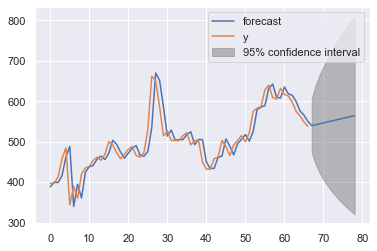

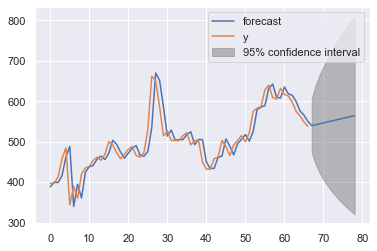

In [24]:
model=ARIMA(x,order=(0,1,1))
model_fit=model.fit()
forecast=model_fit.forecast(steps=10)[0]
model_fit.plot_predict(1,79)

In [28]:
#errors on the test data
val=pd.read_csv("validation.csv",header=None)
rmse=sqrt(mean_squared_error(val[1],forecast))
rmse

43.42374062461908

combine train and test dataand build final model

In [20]:
#fit model
data=read_csv("https://raw.githubusercontent.com/Premalatha-success/Datasets/main/yearly-water-usage.csv",header=0,index_col=0,parse_dates=True)
#prepare data
x=train.values
x=x.astype("float32")

In [26]:
model=ARIMA(x,order=(0,1,1))
model_fit=model.fit()

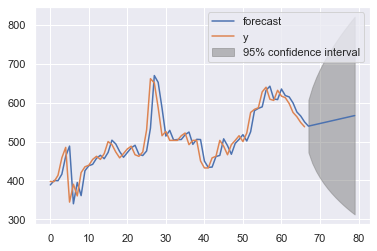

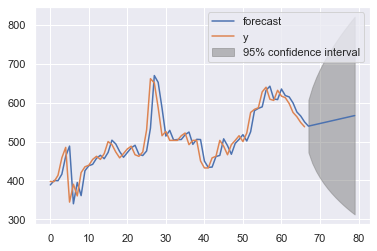

In [38]:
forecast1=model_fit.forecast(steps=10)[0]
model_fit.plot_predict(1,80)

In [41]:
rmse=sqrt(mean_squared_error(val[1],forecast1))
rmse

43.42374062461908